The Kepler Mission is specifically designed to survey our region of the Milky Way galaxy to discover hundreds of Earth-size and smaller planets in or near the habitable zone and determine the fraction of the hundreds of billions of stars in our galaxy that might have such planets.
The scientific objective of the Kepler Mission is to explore the structure and diversity of planetary systems. This is achieved by surveying a large sample of stars to:

Determine the percentage of terrestrial and larger planets that are in or near the habitable zone of a wide variety of stars,
Determine the distribution of sizes and shapes of the orbits of these planets,
Estimate how many planets there are in multiple-star systems,
Determine the variety of orbit sizes and planet reflectivities, sizes, masses and densities of short-period giant planets,
Identify additional members of each discovered planetary system using other techniques,
Determine the properties of those stars that harbor planetary systems.

Dataset = https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

Column Details = https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

# Data Cleaning

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("cumulative_2023.02.06_08.52.56.csv")

In [5]:
df.head(5)

rowid     kepid kepoi_name   kepler_name koi_disposition koi_vet_stat  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED         Done   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED         Done   
2      3  10811496  K00753.01           NaN       CANDIDATE         Done   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE         Done   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED         Done   

  koi_vet_date koi_pdisposition  koi_score  koi_fpflag_nt  ...  koi_fwm_srao  \
0   16-08-2018        CANDIDATE      1.000              0  ...         0.430   
1   16-08-2018        CANDIDATE      0.969              0  ...        -0.630   
2   16-08-2018        CANDIDATE      0.000              0  ...        -0.021   
3   16-08-2018   FALSE POSITIVE      0.000              0  ...        -0.111   
4   16-08-2018        CANDIDATE      1.000              0  ...        -0.010   

   koi_fwm_sdeco  koi_fwm_prao koi_fwm_pdeco koi_dicco_mra  koi_dicco_mdec  \
0          0.940      -0.00020      -0.00055        -0.010           0.200   
1          1.230       0.00066      -0.00105         0.390           0.000   
2         -0.038       0.00070       0.00060        -0.025          -0.034   
3          0.002       0.00302      -0.00142        -0.249           0.147   
4          0.230       0.00008      -0.00007         0.030          -0.090   

   koi_dicco_msky  koi_dikco_mra  koi_dikco_mdec  koi_dikco_msky  
0           0.200          0.080           0.310           0.320  
1           0.390          0.490           0.120           0.500  
2           0.042          0.002          -0.027           0.027  
3           0.289         -0.257           0.099           0.276  
4           0.100          0.070           0.020           0.070  

[5 rows x 83 columns]

In [6]:
df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_time0bk',
       'koi_time0', 'koi_eccen', 'koi_longp', 'koi_impact', 'koi_duration',
       'koi_ingress', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_fittype',
       'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor',
       'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3',
       'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_parm_prov', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits',
       'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_quarters',
       'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof', 'koi_model_chisq',
       'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_steff', 'koi_slogg',
       'koi_smet', 'koi_srad', 'koi_smass', 'koi_s

In [7]:
df.count() #display number of records in each column to find columns without any records

rowid              9564
kepid              9564
kepoi_name         9564
kepler_name        2673
koi_disposition    9564
                   ... 
koi_dicco_mdec     8965
koi_dicco_msky     8965
koi_dikco_mra      8994
koi_dikco_mdec     8994
koi_dikco_msky     8994
Length: 83, dtype: int64

In [8]:
df.info() #observe the Datatype of each column and remove object types that do not have fixed value based on cumulative record collected. these values may be changing after every record update for the same exoplanet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2673 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   float64
 16  koi_time0bk        9564 

In [9]:
df.drop(['koi_tce_plnt_num','koi_bin_oedp_sig','koi_score','rowid','kepid','kepoi_name','kepler_name','koi_vet_stat','koi_vet_date','koi_pdisposition','koi_disp_prov','koi_comment','koi_fittype','koi_limbdark_mod','koi_parm_prov','koi_tce_delivname','koi_trans_mod','koi_datalink_dvr','koi_datalink_dvs','koi_sparprov','koi_longp','koi_ingress','koi_model_dof','koi_model_chisq','koi_sage'], axis=1,inplace=True)

In [10]:
pd.set_option('display.max_columns', None)
df.head(5)

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1       CONFIRMED              0              0              0              0   
2       CANDIDATE              0              0              0              0   
3  FALSE POSITIVE              0              1              0              0   
4       CONFIRMED              0              0              0              0   

   koi_period  koi_time0bk    koi_time0  koi_eccen  koi_impact  koi_duration  \
0    9.488036   170.538750  2455003.539        0.0       0.146       2.95750   
1   54.418383   162.513840  2454995.514        0.0       0.586       4.50700   
2   19.899140   175.850252  2455008.850        0.0       0.969       1.78220   
3    1.736952   170.307565  2455003.308        0.0       1.276       2.40641   
4    2.525592   171.595550  2455004.596        0.0       0.701       1.65450   

   koi_depth   koi_ror  koi_srho  koi_prad  koi_sma  koi_incl  koi_teq  \
0      616.0  0.022344   3.20796      2.26   0.0853     89.66    793.0   
1      875.0  0.027954   3.02368      2.83   0.2734     89.57    443.0   
2    10800.0  0.154046   7.29555     14.60   0.1419     88.96    638.0   
3     8080.0  0.387394   0.22080     33.46   0.0267     67.09   1395.0   
4      603.0  0.024064   1.98635      2.75   0.0374     85.41   1406.0   

   koi_insol  koi_dor  koi_ldm_coeff4  koi_ldm_coeff3  koi_ldm_coeff2  \
0      93.59   24.810             0.0             0.0          0.2291   
1       9.11   77.900             0.0             0.0          0.2291   
2      39.30   53.500             0.0             0.0          0.2711   
3     891.96    3.278             0.0             0.0          0.2865   
4     926.16    8.750             0.0             0.0          0.2844   

   koi_ldm_coeff1  koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr  \
0          0.4603          5.135849        28.470820           35.8   
1          0.4603          7.027669        20.109507           25.8   
2          0.3858         37.159767       187.449100           76.3   
3          0.3556         39.066550       541.895100          505.6   
4          0.3661          4.749945        33.191900           40.9   

   koi_count  koi_num_transits  koi_quarters  koi_steff  koi_slogg  koi_smet  \
0          2             142.0  1.111110e+31     5455.0      4.467      0.14   
1          2              25.0  1.111110e+31     5455.0      4.467      0.14   
2          1              56.0  1.111110e+31     5853.0      4.544     -0.18   
3          1             621.0  1.111110e+31     5805.0      4.564     -0.52   
4          1             515.0  1.111110e+30     6031.0      4.438      0.07   

   koi_srad  koi_smass         ra        dec  koi_kepmag  koi_gmag  koi_rmag  \
0     0.927      0.919  291.93423  48.141651      15.347    15.890    15.270   
1     0.927      0.919  291.93423  48.141651      15.347    15.890    15.270   
2     0.868      0.961  297.00482  48.134129      15.436    15.943    15.390   
3     0.791      0.836  285.53461  48.285210      15.597    16.100    15.554   
4     1.046      1.095  288.75488  48.226200      15.509    16.015    15.468   

   koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag  koi_fwm_stat_sig  \
0    15.114    15.006    14.082    13.751    13.648             0.002   
1    15.114    15.006    14.082    13.751    13.648             0.003   
2    15.220    15.166    14.254    13.900    13.826             0.278   
3    15.382    15.266    14.326    13.911    13.809             0.000   
4    15.292    15.241    14.366    14.064    13.952             0.733   

   koi_fwm_sra  koi_fwm_sdec  koi_fwm_srao  koi_fwm_sdeco  koi_fwm_prao  \
0    19.462294      48.14191         0.430          0.940      -0.00020   
1    19.462265      48.14199        -0.630          1.230       0.00066   
2    19.800321      48.13412        -0.021         -0.038       0.00070   
3    19.035638      48

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
df.isna().sum()

koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_time0bk            0
koi_time0              0
koi_eccen            363
koi_impact           363
koi_duration           0
koi_depth            363
koi_ror              363
koi_srho             321
koi_prad             363
koi_sma              363
koi_incl             364
koi_teq              363
koi_insol            321
koi_dor              363
koi_ldm_coeff4       363
koi_ldm_coeff3       363
koi_ldm_coeff2       363
koi_ldm_coeff1       363
koi_max_sngle_ev    1142
koi_max_mult_ev     1142
koi_model_snr        363
koi_count              0
koi_num_transits    1142
koi_quarters        1142
koi_steff            363
koi_slogg            363
koi_smet             386
koi_srad             363
koi_smass            363
ra                     0
dec                    0
koi_kepmag             1
koi_gmag              41
koi_rmag               9


In [13]:
df = df.dropna(how='any',axis=0) #drop the rows with NaN values as it's only around 1/10th of the amount of data

In [14]:
df[df == np.inf].count()

koi_disposition     0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_period          0
koi_time0bk         0
koi_time0           0
koi_eccen           0
koi_impact          0
koi_duration        0
koi_depth           0
koi_ror             0
koi_srho            0
koi_prad            0
koi_sma             0
koi_incl            0
koi_teq             0
koi_insol           0
koi_dor             0
koi_ldm_coeff4      0
koi_ldm_coeff3      0
koi_ldm_coeff2      0
koi_ldm_coeff1      0
koi_max_sngle_ev    0
koi_max_mult_ev     0
koi_model_snr       0
koi_count           0
koi_num_transits    0
koi_quarters        0
koi_steff           0
koi_slogg           0
koi_smet            0
koi_srad            0
koi_smass           0
ra                  0
dec                 0
koi_kepmag          0
koi_gmag            0
koi_rmag            0
koi_imag            0
koi_zmag            0
koi_jmag            0
koi_hmag            0
koi_kmag            0
koi_fwm_st

In [15]:
df2 = df.copy()
df2.tail(5)

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
9559  FALSE POSITIVE              0              1              1   
9560       CANDIDATE              0              0              0   
9561  FALSE POSITIVE              0              0              1   
9562       CANDIDATE              0              0              0   
9563  FALSE POSITIVE              0              0              1   

      koi_fpflag_ec  koi_period  koi_time0bk    koi_time0  koi_eccen  \
9559              0    0.527699   131.705093  2454964.705        0.0   
9560              0    1.739849   133.001270  2454966.001        0.0   
9561              0    0.681402   132.181750  2454965.182        0.0   
9562              0  333.486169   153.615010  2454986.615        0.0   
9563              1    4.856035   135.993300  2454968.993        0.0   

      koi_impact  koi_duration  koi_depth   koi_ror  koi_srho  koi_prad  \
9559       1.252        3.2221     1580.0  0.297633   0.16318     29.35   
9560       0.043        3.1140       48.5  0.006379   0.50770      0.72   
9561       0.147        0.8650      104.0  0.009444   8.97692      1.07   
9562       0.214        3.1990      639.0  0.022590  85.88623     19.30   
9563       0.134        3.0780       76.7  0.008076   1.40645      1.05   

      koi_sma  koi_incl  koi_teq  koi_insol  koi_dor  koi_ldm_coeff4  \
9559   0.0128     20.78   2088.0    4500.53    1.339             0.0   
9560   0.0290     89.42   1608.0    1585.81    4.331             0.0   
9561   0.0157     88.60   2218.0    5713.41    6.040             0.0   
9562   1.2233     89.98    557.0      22.68  796.000             0.0   
9563   0.0606     89.36   1266.0     607.42   12.060             0.0   

      koi_ldm_coeff3  koi_ldm_coeff2  koi_ldm_coeff1  koi_max_sngle_ev  \
9559             0.0          0.2602          0.4096         21.335920   
9560             0.0          0.2868          0.3588          3.841146   
9561             0.0          0.3029          0.3239          3.748643   
9562             0.0          0.1697          0.5559          5.252939   
9563             0.0          0.3138          0.2998          3.253128   

      koi_max_mult_ev  koi_model_snr  koi_count  koi_num_transits  \
9559       223.141400          453.3          1            2026.0   
9560         8.569540           10.6          1             766.0   
9561         9.653322           12.3          1            1969.0   
9562         7.240365           14.0          1               3.0   
9563         7.167940            8.2          1             218.0   

      koi_quarters  koi_steff  koi_slogg  koi_smet  koi_srad  koi_smass  \
9559  1.111110e+31     5638.0      4.529      0.14     0.903      1.005   
9560  1.111110e+31     6119.0      4.444     -0.04     1.031      1.075   
9561  1.111110e+31     6173.0      4.447     -0.04     1.041      1.104   
9562  1.111110e+31     4989.0      2.992      0.07     7.824      2.190   
9563  1.111110e+31     6469.0      4.385      0.07     1.193      1.260   

             ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  \
9559  297.18875  47.093819      14.082    14.082    13.501    13.299   
9560  286.50937  47.163219      14.757    15.189    14.687    14.571   
9561  294.16489  47.176281      15.385    15.853    15.347    15.185   
9562  296.76288  47.145142      10.998    11.733    10.880    10.682   
9563  297.00977  47.121021      14.826    15.210    14.781    14.662   

      koi_zmag  koi_jmag  koi_hmag  koi_kmag  koi_fwm_stat_sig  koi_fwm_sra  \
9559    13.177    12.200    11.814    11.756             0.000    19.812604   
9560    14.484    13.641    13.339    13.261             0.089    19.100625   
9561    15.158    14.220    13.913    13.844             0.000    19.611187   
9562    10.578     9.501     9.027     8.921             0.052    19.784200   
9563    14.647    13.830    13.522    13.512             0.000    19.800732   

      koi_fwm_sdec  koi_fwm_srao  koi_fwm_sdeco  koi_f

In [16]:
df2 = df2[df.koi_disposition != 'CANDIDATE']

In [17]:
df2.tail(5)

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
9557  FALSE POSITIVE              1              0              0   
9558  FALSE POSITIVE              0              0              0   
9559  FALSE POSITIVE              0              1              1   
9561  FALSE POSITIVE              0              0              1   
9563  FALSE POSITIVE              0              0              1   

      koi_fpflag_ec  koi_period  koi_time0bk    koi_time0  koi_eccen  \
9557              0  373.893980   261.496800  2455094.497        0.0   
9558              1    8.589871   132.016100  2454965.016        0.0   
9559              0    0.527699   131.705093  2454964.705        0.0   
9561              0    0.681402   132.181750  2454965.182        0.0   
9563              1    4.856035   135.993300  2454968.993        0.0   

      koi_impact  koi_duration  koi_depth   koi_ror  koi_srho  koi_prad  \
9557       0.963       27.6600      730.0  0.032878   0.00771      2.51   
9558       0.765        4.8060       87.7  0.009364   0.18863      1.11   
9559       1.252        3.2221     1580.0  0.297633   0.16318     29.35   
9561       0.147        0.8650      104.0  0.009444   8.97692      1.07   
9563       0.134        3.0780       76.7  0.008076   1.40645      1.05   

      koi_sma  koi_incl  koi_teq  koi_insol  koi_dor  koi_ldm_coeff4  \
9557   0.8885     88.57    206.0       0.42   38.500             0.0   
9558   0.0779     85.14    929.0     176.40    9.030             0.0   
9559   0.0128     20.78   2088.0    4500.53    1.339             0.0   
9561   0.0157     88.60   2218.0    5713.41    6.040             0.0   
9563   0.0606     89.36   1266.0     607.42   12.060             0.0   

      koi_ldm_coeff3  koi_ldm_coeff2  koi_ldm_coeff1  koi_max_sngle_ev  \
9557             0.0          0.2337          0.4535          6.991814   
9558             0.0          0.2711          0.3858          3.069171   
9559             0.0          0.2602          0.4096         21.335920   
9561             0.0          0.3029          0.3239          3.748643   
9563             0.0          0.3138          0.2998          3.253128   

      koi_max_mult_ev  koi_model_snr  koi_count  koi_num_transits  \
9557         8.046221           18.5          1               4.0   
9558         7.634808            8.4          1             125.0   
9559       223.141400          453.3          1            2026.0   
9561         9.653322           12.3          1            1969.0   
9563         7.167940            8.2          1             218.0   

      koi_quarters  koi_steff  koi_slogg  koi_smet  koi_srad  koi_smass  \
9557  1.111110e+31     5263.0      4.574     -0.66     0.699      0.668   
9558  1.111110e+31     5638.0      4.296     -0.16     1.088      0.856   
9559  1.111110e+31     5638.0      4.529      0.14     0.903      1.005   
9561  1.111110e+31     6173.0      4.447     -0.04     1.041      1.104   
9563  1.111110e+31     6469.0      4.385      0.07     1.193      1.260   

             ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  \
9557  290.93597  47.290730      14.911    15.534    14.863    14.643   
9558  298.74921  46.973351      14.478    15.064    14.441    14.227   
9559  297.18875  47.093819      14.082    14.082    13.501    13.299   
9561  294.16489  47.176281      15.385    15.853    15.347    15.185   
9563  297.00977  47.121021      14.826    15.210    14.781    14.662   

      koi_zmag  koi_jmag  koi_hmag  koi_kmag  koi_fwm_stat_sig  koi_fwm_sra  \
9557    14.487    13.487    13.066    12.926             0.768    19.395705   
9558    14.144    13.153    12.847    12.724             0.387    19.916643   
9559    13.177    12.200    11.814    11.756             0.000    19.812604   
9561    15.158    14.220    13.913    13.844             0.000    19.611187   
9563    14.647    13.830    13.522    13.512             0.000    19.800732   

      koi_fwm_sdec  koi_fwm_srao  koi_fwm_sdeco  koi_f

# Feature Engineering

In [18]:
corr_matrix = df2.corr()
corr_matrix

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
koi_fpflag_nt          1.000000      -0.021118      -0.005191       0.000405   
koi_fpflag_ss         -0.021118       1.000000       0.077080       0.020637   
koi_fpflag_co         -0.005191       0.077080       1.000000       0.504125   
koi_fpflag_ec          0.000405       0.020637       0.504125       1.000000   
koi_period             0.016259      -0.064793      -0.139729      -0.123918   
koi_time0bk            0.014022      -0.056635      -0.111442      -0.108916   
koi_time0              0.014022      -0.056635      -0.111442      -0.108916   
koi_eccen                   NaN            NaN            NaN            NaN   
koi_impact             0.000433       0.083900       0.002639      -0.007561   
koi_duration           0.012553       0.046213      -0.041678       0.038741   
koi_depth             -0.006782       0.421164      -0.168261      -0.120937   
koi_ror                0.001018       0.066982      -0.026126      -0.024560   
koi_srho               0.002940      -0.011137      -0.025368      -0.048443   
koi_prad               0.002092       0.002263      -0.014247      -0.011299   
koi_sma                0.015909      -0.066295      -0.181469      -0.162672   
koi_incl              -0.005895      -0.153776      -0.294125      -0.281305   
koi_teq               -0.004020       0.141798       0.289724       0.224466   
koi_insol              0.001255       0.037357       0.053411       0.017411   
koi_dor                0.013192      -0.057265      -0.161097      -0.152585   
koi_ldm_coeff4              NaN            NaN            NaN            NaN   
koi_ldm_coeff3              NaN            NaN            NaN            NaN   
koi_ldm_coeff2        -0.010512       0.125532       0.051435       0.038484   
koi_ldm_coeff1         0.009702      -0.156779      -0.065097      -0.045309   
koi_max_sngle_ev      -0.005745       0.312939      -0.120372      -0.085154   
koi_max_mult_ev       -0.006753       0.355145      -0.137132      -0.097456   
koi_model_snr         -0.007849       0.407914      -0.168500      -0.121125   
koi_count             -0.013595      -0.273629      -0.239312      -0.176400   
koi_num_transits      -0.000962       0.073607       0.344901       0.315247   
koi_quarters           0.004721      -0.113986      -0.058180      -0.048998   
koi_steff             -0.001168       0.134624       0.046554       0.022151   
koi_slogg             -0.000803      -0.087007      -0.024291       0.024514   
koi_smet               0.013557      -0.235947      -0.125762      -0.098526   
koi_srad               0.001125       0.053947       0.040358      -0.008100   
koi_smass              0.004777       0.074461       0.030607      -0.010425   
ra                     0.017760       0.084323       0.183652       0.063584   
dec                    0.013802      -0.043940      -0.121550      -0.047288   
koi_kepmag            -0.001057      -0.012200       0.066868       0.059624   
koi_gmag              -0.000121      -0.026351       0.059911       0.055140   
koi_rmag              -0.001352      -0.010813       0.065410       0.058800   
koi_imag              -0.001442      -0.004632       0.068631       0.060682   
koi_zmag              -0.001278      -0.002582       0.068770       0.061400   
koi_jmag              -0.001916       0.002288       0.069928       0.062209   
koi_hmag              -0.002753       0.008804       0.070944       0.062338   
koi_kmag              -0.002568       0.009392       0.072033       0.063283   
koi_fwm_stat_sig       0.031918      -0.265583      -0.258671      -0.143030   
koi_fwm_sra            0.017761       0.084320       0.183605       0.063552   
koi_fwm_sdec           0.013803      -0.043952      -0.121639      -0.047319   
koi_fwm_srao           0.001099      -0.005072      -0.057697      -0.039076   
koi_fwm_sdeco          0.001625      -0.011975      -0.082989      -0.028506   
koi_fwm_prao      

In [19]:
df2.columns
col = ['koi_disposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_time0', 'koi_eccen', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_ror', 'koi_srho', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq',
       'koi_insol', 'koi_dor', 'koi_ldm_coeff4', 'koi_ldm_coeff3',
       'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits',
       'koi_quarters', 'koi_steff',
       'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass', 'ra', 'dec',
       'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag',
       'koi_jmag', 'koi_hmag', 'koi_kmag', 'koi_fwm_stat_sig', 'koi_fwm_sra',
       'koi_fwm_sdec', 'koi_fwm_srao', 'koi_fwm_sdeco', 'koi_fwm_prao',
       'koi_fwm_pdeco', 'koi_dicco_mra', 'koi_dicco_mdec', 'koi_dicco_msky',
       'koi_dikco_mra', 'koi_dikco_mdec', 'koi_dikco_msky']

In [20]:
one = pd.get_dummies(df2, columns = ['koi_disposition'])

In [21]:
one.drop('koi_disposition_FALSE POSITIVE',inplace=True,axis=1)
one.rename(columns = {'koi_disposition_CONFIRMED':'koi_disposition'}, inplace = True)
one.head(4)

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0              0              0              0              0    9.488036   
1              0              0              0              0   54.418383   
3              0              1              0              0    1.736952   
4              0              0              0              0    2.525592   

   koi_time0bk    koi_time0  koi_eccen  koi_impact  koi_duration  koi_depth  \
0   170.538750  2455003.539        0.0       0.146       2.95750      616.0   
1   162.513840  2454995.514        0.0       0.586       4.50700      875.0   
3   170.307565  2455003.308        0.0       1.276       2.40641     8080.0   
4   171.595550  2455004.596        0.0       0.701       1.65450      603.0   

    koi_ror  koi_srho  koi_prad  koi_sma  koi_incl  koi_teq  koi_insol  \
0  0.022344   3.20796      2.26   0.0853     89.66    793.0      93.59   
1  0.027954   3.02368      2.83   0.2734     89.57    443.0       9.11   
3  0.387394   0.22080     33.46   0.0267     67.09   1395.0     891.96   
4  0.024064   1.98635      2.75   0.0374     85.41   1406.0     926.16   

   koi_dor  koi_ldm_coeff4  koi_ldm_coeff3  koi_ldm_coeff2  koi_ldm_coeff1  \
0   24.810             0.0             0.0          0.2291          0.4603   
1   77.900             0.0             0.0          0.2291          0.4603   
3    3.278             0.0             0.0          0.2865          0.3556   
4    8.750             0.0             0.0          0.2844          0.3661   

   koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr  koi_count  \
0          5.135849        28.470820           35.8          2   
1          7.027669        20.109507           25.8          2   
3         39.066550       541.895100          505.6          1   
4          4.749945        33.191900           40.9          1   

   koi_num_transits  koi_quarters  koi_steff  koi_slogg  koi_smet  koi_srad  \
0             142.0  1.111110e+31     5455.0      4.467      0.14     0.927   
1              25.0  1.111110e+31     5455.0      4.467      0.14     0.927   
3             621.0  1.111110e+31     5805.0      4.564     -0.52     0.791   
4             515.0  1.111110e+30     6031.0      4.438      0.07     1.046   

   koi_smass         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  \
0      0.919  291.93423  48.141651      15.347    15.890    15.270    15.114   
1      0.919  291.93423  48.141651      15.347    15.890    15.270    15.114   
3      0.836  285.53461  48.285210      15.597    16.100    15.554    15.382   
4      1.095  288.75488  48.226200      15.509    16.015    15.468    15.292   

   koi_zmag  koi_jmag  koi_hmag  koi_kmag  koi_fwm_stat_sig  koi_fwm_sra  \
0    15.006    14.082    13.751    13.648             0.002    19.462294   
1    15.006    14.082    13.751    13.648             0.003    19.462265   
3    15.266    14.326    13.911    13.809             0.000    19.035638   
4    15.241    14.366    14.064    13.952             0.733    19.250326   

   koi_fwm_sdec  koi_fwm_srao  koi_fwm_sdeco  koi_fwm_prao  koi_fwm_pdeco  \
0      48.14191         0.430          0.940      -0.00020       -0.00055   
1      48.14199        -0.630          1.230       0.00066       -0.00105   
3      48.28521        -0.111          0.002       0.00302       -0.00142   
4      48.22626        -0.010          0.230       0.00008       -0.00007   

   koi_dicco_mra  koi_dicco_mdec  koi_dicco_msky  koi_dikco_mra  \
0         -0.010           0.200           0.200          0.080   
1          0.390           0.000           0.390          0.490   
3         -0.249           0.147           0.289         -0.257   
4          0.030          -0.090           0.100          0.070   

   koi_dikco_mdec  koi_dikco_msky  koi_disposition  
0           0.310           0.320                1  
1           0.120           0.500                1  
3           0.099           0.276                0  
4           0.02

In [22]:
x = one.iloc[:,:-1]
y = one.iloc[:,-1]

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [24]:
col = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_time0', 'koi_eccen',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_ror', 'koi_srho',
       'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor',
       'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_ldm_coeff2', 'koi_ldm_coeff1',
       'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_count',
       'koi_num_transits', 'koi_quarters', 'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad',
       'koi_smass', 'ra', 'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag',
       'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag',
       'koi_fwm_stat_sig', 'koi_fwm_sra', 'koi_fwm_sdec', 'koi_fwm_srao',
       'koi_fwm_sdeco', 'koi_fwm_prao', 'koi_fwm_pdeco', 'koi_dicco_mra',
       'koi_dicco_mdec', 'koi_dicco_msky', 'koi_dikco_mra', 'koi_dikco_mdec',
       'koi_dikco_msky']
feature_imp = pd.Series(model.feature_importances_, index = col)
feature_imp.sort_values(ascending=False)

koi_fpflag_ss       0.256809
koi_fpflag_co       0.147586
koi_fpflag_ec       0.078842
koi_fpflag_nt       0.070019
koi_dikco_msky      0.051794
koi_count           0.036404
koi_incl            0.025939
koi_fwm_stat_sig    0.023011
koi_dicco_msky      0.020275
koi_depth           0.020004
koi_num_transits    0.015974
koi_teq             0.015141
koi_sma             0.014348
koi_max_mult_ev     0.014049
koi_period          0.012885
koi_dikco_mra       0.012634
koi_smet            0.011154
koi_model_snr       0.010621
koi_dicco_mra       0.010559
koi_dikco_mdec      0.010076
koi_max_sngle_ev    0.009887
koi_dicco_mdec      0.009789
koi_ror             0.009712
koi_duration        0.007982
koi_steff           0.007376
koi_dor             0.007253
koi_slogg           0.006898
koi_prad            0.006326
koi_smass           0.005465
koi_ldm_coeff1      0.005447
koi_impact          0.005272
koi_fwm_sdeco       0.005103
koi_fwm_srao        0.004976
koi_srad            0.004586
koi_time0     

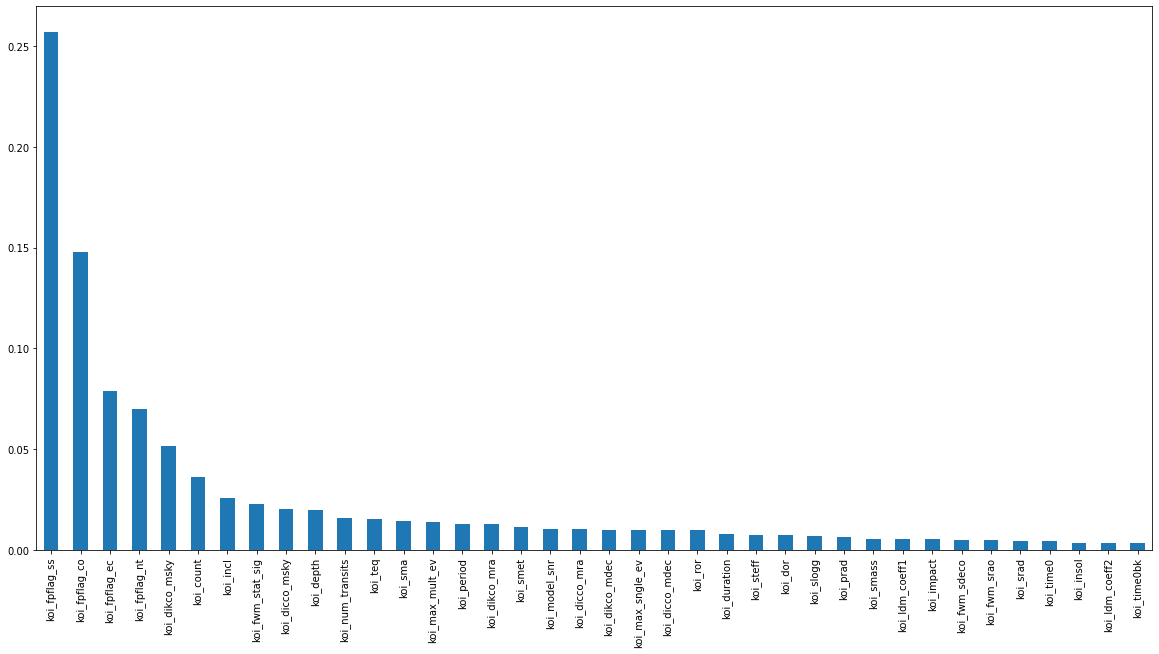

In [25]:
plt.figure(figsize=(20,10))
feature_imp.nlargest(38).plot(kind = "bar")
plt.show()

In [26]:
one.head(5)

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0              0              0              0              0    9.488036   
1              0              0              0              0   54.418383   
3              0              1              0              0    1.736952   
4              0              0              0              0    2.525592   
8              0              1              1              0    7.361790   

   koi_time0bk    koi_time0  koi_eccen  koi_impact  koi_duration  koi_depth  \
0   170.538750  2455003.539        0.0       0.146       2.95750      616.0   
1   162.513840  2454995.514        0.0       0.586       4.50700      875.0   
3   170.307565  2455003.308        0.0       1.276       2.40641     8080.0   
4   171.595550  2455004.596        0.0       0.701       1.65450      603.0   
8   132.250530  2454965.251        0.0       1.169       5.02200      234.0   

    koi_ror  koi_srho  koi_prad  koi_sma  koi_incl  koi_teq  koi_insol  \
0  0.022344   3.20796      2.26   0.0853     89.66    793.0      93.59   
1  0.027954   3.02368      2.83   0.2734     89.57    443.0       9.11   
3  0.387394   0.22080     33.46   0.0267     67.09   1395.0     891.96   
4  0.024064   1.98635      2.75   0.0374     85.41   1406.0     926.16   
8  0.183387   0.00485     39.21   0.0820     60.92   1342.0     767.22   

   koi_dor  koi_ldm_coeff4  koi_ldm_coeff3  koi_ldm_coeff2  koi_ldm_coeff1  \
0   24.810             0.0             0.0          0.2291          0.4603   
1   77.900             0.0             0.0          0.2291          0.4603   
3    3.278             0.0             0.0          0.2865          0.3556   
4    8.750             0.0             0.0          0.2844          0.3661   
8    2.400             0.0             0.0          0.3050          0.3201   

   koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr  koi_count  \
0          5.135849        28.470820           35.8          2   
1          7.027669        20.109507           25.8          2   
3         39.066550       541.895100          505.6          1   
4          4.749945        33.191900           40.9          1   
8         10.964684        46.153080           47.7          1   

   koi_num_transits  koi_quarters  koi_steff  koi_slogg  koi_smet  koi_srad  \
0             142.0  1.111110e+31     5455.0      4.467      0.14     0.927   
1              25.0  1.111110e+31     5455.0      4.467      0.14     0.927   
3             621.0  1.111110e+31     5805.0      4.564     -0.52     0.791   
4             515.0  1.111110e+30     6031.0      4.438      0.07     1.046   
8             185.0  1.111110e+31     6227.0      3.986      0.00     1.958   

   koi_smass         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  \
0      0.919  291.93423  48.141651      15.347    15.890    15.270    15.114   
1      0.919  291.93423  48.141651      15.347    15.890    15.270    15.114   
3      0.836  285.53461  48.285210      15.597    16.100    15.554    15.382   
4      1.095  288.75488  48.226200      15.509    16.015    15.468    15.292   
8      1.358  298.86435  42.151569      12.660    12.999    12.609    12.515   

   koi_zmag  koi_jmag  koi_hmag  koi_kmag  koi_fwm_stat_sig  koi_fwm_sra  \
0    15.006    14.082    13.751    13.648             0.002    19.462294   
1    15.006    14.082    13.751    13.648             0.003    19.462265   
3    15.266    14.326    13.911    13.809             0.000    19.035638   
4    15.241    14.366    14.064    13.952             0.733    19.250326   
8    12.480    11.659    11.415    11.396             0.000    19.923953   

   koi_fwm_sdec  koi_fwm_srao  koi_fwm_sdeco  koi_fwm_prao  koi_fwm_pdeco  \
0     48.141910         0.430          0.940      -0.00020       -0.00055   
1     48.141990        -0.630          1.230       0.00066       -0.00105   
3     48.285210        -0.111          0.002       0.00302       -0.00142   
4     48.226260        -0.010    

# DATA ANALYSIS

## PERCENTAGE OF CONFIRMED AND FALSE POSITIVE EXOPLANET RECORDS 

FALSE POSITIVE    3098
CONFIRMED         2431
Name: koi_disposition, dtype: int64


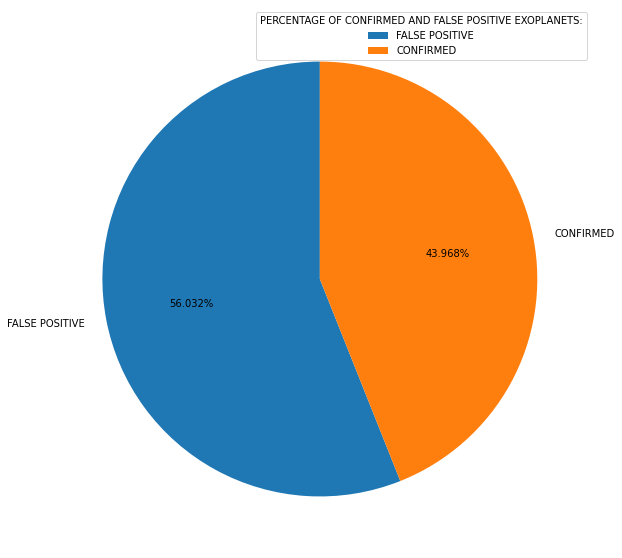

In [27]:
#create figure for graph
fig1 = plt.figure(figsize = (10, 10))
#count number of occurences for each label
vals = df2['koi_disposition'].value_counts()
print(vals)
#create a list of labels to display on pie chart
label = vals.index
#create pie chart
plt.pie(vals,labels=label, autopct='%.3f%%',
        shadow=False, startangle=90)
plt.legend(title = "PERCENTAGE OF CONFIRMED AND FALSE POSITIVE EXOPLANETS:")
plt.show()

## DATA DESCRIPTION

In [28]:
df2.describe()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
count    5529.000000    5529.000000    5529.000000    5529.000000   
mean        0.212516       0.286309       0.259360       0.159884   
std         6.260813       0.452076       0.438323       0.366532   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       1.000000       1.000000       0.000000   
max       465.000000       1.000000       1.000000       1.000000   

        koi_period  koi_time0bk     koi_time0  koi_eccen   koi_impact  \
count  5529.000000  5529.000000  5.529000e+03     5529.0  5529.000000   
mean     36.506370   157.260899  2.454990e+06        0.0     0.703390   
std      86.397065    53.983658  5.398366e+01        0.0     2.551334   
min       0.306938   120.515914  2.454954e+06        0.0     0.000000   
25%       2.377955   132.604851  2.454966e+06        0.0     0.218000   
50%       7.674661   136.206870  2.454969e+06        0.0     0.603000   
75%      23.921041   163.214710  2.454996e+06        0.0     0.917000   
max    1071.232624   801.455201  2.455634e+06        0.0   100.806000   

       koi_duration      koi_depth      koi_ror     koi_srho       koi_prad  \
count   5529.000000    5529.000000  5529.000000  5529.000000    5529.000000   
mean       5.499755   20110.971441     0.222671     3.507113     105.736971   
std        6.794852   65165.618694     2.509060    24.492252    3588.797030   
min        0.104600       0.800000     0.001289     0.000040       0.080000   
25%        2.459900     181.000000     0.013138     0.185810       1.460000   
50%        3.748000     487.000000     0.023571     0.796870       2.540000   
75%        5.938000    1800.000000     0.139516     2.376950      18.830000   
max      138.540000  864000.000000    99.870651   918.752390  200346.000000   

           koi_sma     koi_incl      koi_teq     koi_insol      koi_dor  \
count  5529.000000  5529.000000  5529.000000  5.529000e+03  5529.000000   
mean      0.157732    81.574312  1121.746609  3.433860e+03    36.204690   
std       0.237082    15.921800   761.035729  3.531940e+04    81.361674   
min       0.007200     2.290000    92.000000  2.000000e-02     0.386000   
25%       0.034400    82.520000   610.000000  3.274000e+01     4.700000   
50%       0.074900    88.010000   929.000000  1.760400e+02    12.920000   
75%       0.159900    89.550000  1436.000000  1.006130e+03    31.540000   
max       2.034500    90.000000  9791.000000  2.169686e+06  1603.000000   

       koi_ldm_coeff4  koi_ldm_coeff3  koi_ldm_coeff2  koi_ldm_coeff1  \
count          5529.0          5529.0     5529.000000     5529.000000   
mean              0.0             0.0        0.253211        0.410217   
std               0.0             0.0        0.063579        0.104028   
min               0.0             0.0       -0.120600        0.127800   
25%               0.0             0.0        0.224000        0.334200   
50%               0.0             0.0        0.267800        0.392800   
75%               0.0             0.0        0.297900        0.469500   
max               0.0             0.0        0.464000        0.944300   

       koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr    koi_count  \
count       5529.000000      5529.000000    5529.000000  5529.000000   
mean         159.909092       869.375600     284.686905     1.455055   
std          710.051352      3444.608492     822.214517     0.940821   
min            2.538761         7.105086       0.000000     1.000000   
25%            4.168174        12.803437      16.900000     1.000000   
50%            5.929023        22.974052      31.600000     1.000000   
75%           17.345167        79.333870      99.800000     2.000000   
max        22982.162000     48732.562000    9054.700000     7.000000   

       koi_num_transits  koi_qua

In [29]:
d1 = df2[df2['koi_disposition'] == 'CONFIRMED']
d2 = df2[df2['koi_disposition'] == 'FALSE POSITIVE']

In [30]:
d1.describe()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
count    2431.000000    2431.000000         2431.0         2431.0   
mean        0.191279       0.003702            0.0            0.0   
std         9.431059       0.060745            0.0            0.0   
min         0.000000       0.000000            0.0            0.0   
25%         0.000000       0.000000            0.0            0.0   
50%         0.000000       0.000000            0.0            0.0   
75%         0.000000       0.000000            0.0            0.0   
max       465.000000       1.000000            0.0            0.0   

        koi_period  koi_time0bk     koi_time0  koi_eccen   koi_impact  \
count  2431.000000  2431.000000  2.431000e+03     2431.0  2431.000000   
mean     27.759408   157.107943  2.454990e+06        0.0     0.437789   
std      52.182643    42.376251  4.237625e+01        0.0     0.336868   
min       0.341842   121.119423  2.454954e+06        0.0     0.000000   
25%       5.211674   134.288309  2.454967e+06        0.0     0.092000   
50%      11.637030   140.356790  2.454973e+06        0.0     0.407000   
75%      27.487050   170.974447  2.455004e+06        0.0     0.763000   
max    1071.232624   589.719750  2.455423e+06        0.0     1.300000   

       koi_duration     koi_depth      koi_ror     koi_srho     koi_prad  \
count   2431.000000   2431.000000  2431.000000  2431.000000  2431.000000   
mean       4.254165   1073.820732     0.025809     2.643490     2.847454   
std        2.656425   2567.888794     0.024051     5.020549     3.337313   
min        0.643000     24.300000     0.004548     0.004450     0.420000   
25%        2.456800    228.500000     0.014520     0.508330     1.535000   
50%        3.534000    464.000000     0.021172     1.410510     2.180000   
75%        5.308050    867.000000     0.028539     2.856635     2.925000   
max       24.420000  36900.000000     0.415349   102.865340    77.760000   

           koi_sma     koi_incl      koi_teq     koi_insol      koi_dor  \
count  2431.000000  2431.000000  2431.000000   2431.000000  2431.000000   
mean      0.145743    87.932768   823.779103    302.129790    32.566989   
std       0.151320     3.399290   370.599972    754.993919    39.000045   
min       0.008900    40.980000   129.000000      0.070000     1.268000   
25%       0.056350    87.520000   550.000000     21.555000    10.970000   
50%       0.097600    89.060000   770.000000     83.210000    20.030000   
75%       0.175150    89.805000  1019.000000    254.760000    37.037500   
max       1.860000    90.000000  2740.000000  13331.510000   557.300000   

       koi_ldm_coeff4  koi_ldm_coeff3  koi_ldm_coeff2  koi_ldm_coeff1  \
count          2431.0          2431.0     2431.000000     2431.000000   
mean              0.0             0.0        0.240053        0.438795   
std               0.0             0.0        0.066515        0.099417   
min               0.0             0.0        0.033800        0.209900   
25%               0.0             0.0        0.200800        0.358800   
50%               0.0             0.0        0.258900        0.419100   
75%               0.0             0.0        0.286800        0.508600   
max               0.0             0.0        0.441800        0.730600   

       koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr    koi_count  \
count       2431.000000      2431.000000    2431.000000  2431.000000   
mean          11.658818        68.489254      73.657302     1.946113   
std           25.078278       239.792608     216.800674     1.204235   
min            2.695048         7.486076       6.800000     1.000000   
25%            4.292469        15.760544      19.300000     1.000000   
50%            5.576774        24.248087      28.800000     2.000000   
75%            8.758004        41.444108      50.900000     3.000000   
max          544.170100      6468.040000    4304.300000     7.000000   

       koi_num_transits  koi_quarters    koi_steff    koi_s

In [31]:
d2.describe()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
count    3098.000000    3098.000000    3098.000000    3098.000000   
mean        0.229180       0.508070       0.462879       0.285345   
std         0.420373       0.500016       0.498701       0.451652   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

        koi_period  koi_time0bk     koi_time0  koi_eccen   koi_impact  \
count  3098.000000  3098.000000  3.098000e+03     3098.0  3098.000000   
mean     43.370109   157.380924  2.454990e+06        0.0     0.911808   
std     105.261322    61.585255  6.158526e+01        0.0     3.380967   
min       0.306938   120.515914  2.454954e+06        0.0     0.000000   
25%       1.332556   132.091008  2.454965e+06        0.0     0.372000   
50%       4.307493   133.829215  2.454967e+06        0.0     0.732500   
75%      19.964276   146.450800  2.454979e+06        0.0     1.081250   
max     677.562820   801.455201  2.455634e+06        0.0   100.806000   

       koi_duration      koi_depth      koi_ror     koi_srho       koi_prad  \
count   3098.000000    3098.000000  3098.000000  3098.000000    3098.000000   
mean       6.477170   35049.419916     0.377147     4.184798     186.474354   
std        8.642974   84065.607977     3.343982    32.402445    4793.161939   
min        0.104600       0.800000     0.001289     0.000040       0.080000   
25%        2.465982     136.000000     0.011626     0.095800       1.350000   
50%        3.923300     529.500000     0.048373     0.413350       9.840000   
75%        6.661250   17275.000000     0.330819     1.633847      40.377500   
max      138.540000  864000.000000    99.870651   918.752390  200346.000000   

           koi_sma     koi_incl      koi_teq     koi_insol      koi_dor  \
count  3098.000000  3098.000000  3098.000000  3.098000e+03  3098.000000   
mean      0.167140    76.584832  1355.561653  5.891328e+03    39.059194   
std       0.286637    19.666904   895.353282  4.703691e+04   102.975387   
min       0.007200     2.290000    92.000000  2.000000e-02     0.386000   
25%       0.024025    73.347500   708.750000  5.972750e+01     2.600872   
50%       0.052000    85.455000  1183.500000  4.638500e+02     6.490500   
75%       0.143700    88.950000  1795.750000  2.458075e+03    24.328800   
max       2.034500    90.000000  9791.000000  2.169686e+06  1603.000000   

       koi_ldm_coeff4  koi_ldm_coeff3  koi_ldm_coeff2  koi_ldm_coeff1  \
count          3098.0          3098.0     3098.000000     3098.000000   
mean              0.0             0.0        0.263536        0.387792   
std               0.0             0.0        0.059173        0.102066   
min               0.0             0.0       -0.120600        0.127800   
25%               0.0             0.0        0.239600        0.315300   
50%               0.0             0.0        0.286500        0.358800   
75%               0.0             0.0        0.302300        0.441500   
max               0.0             0.0        0.464000        0.944300   

       koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr    koi_count  \
count       3098.000000      3098.000000    3098.000000  3098.000000   
mean         276.241054      1497.830961     450.281795     1.069722   
std          932.009809      4498.374174    1052.343594     0.322917   
min            2.538761         7.105086       0.000000     1.000000   
25%            4.037408        10.368863      14.200000     1.000000   
50%            6.526075        20.837701      37.000000     1.000000   
75%           98.785528       597.774983     284.375000     1.000000   
max        22982.162000     48732.562000    9054.700000     7.000000   

       koi_num_transits  koi_qua

# CONFIRMED EXOPLANET CHARACTERISTICS

## PLANETARY DURATION OF TRANSIT

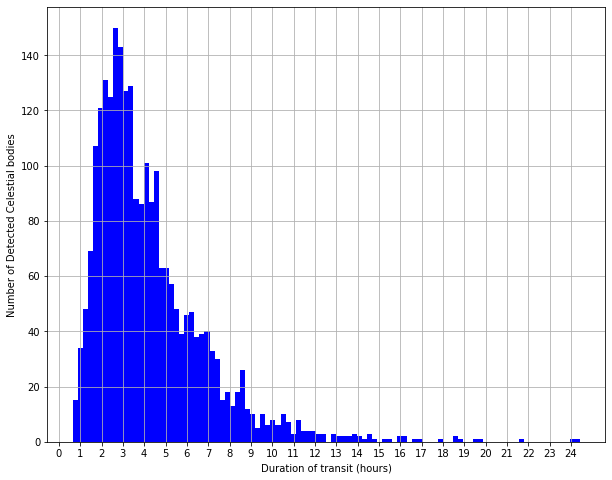

In [32]:
ax = d1.koi_duration.hist(bins=100, figsize=(10, 8), color = 'blue')
ax.set_xlabel("Duration of transit (hours)")
ax.set_ylabel("Number of Detected Celestial bodies")
ax.set_xticks(range(0,25))

## NUMBER OF EXPECTED TRANSITS FOR PLANETS

Text(0, 0.5, 'Number of Detected Celestial bodies')

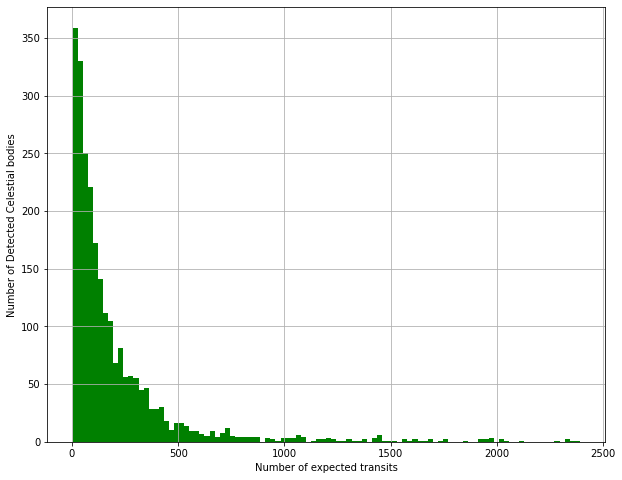

In [33]:
ax2 = d1.koi_num_transits.hist(bins=100, figsize=(10, 8), color = 'green')
ax2.set_xlabel("Number of expected transits")
ax2.set_ylabel("Number of Detected Celestial bodies")


## PLANETARY ORBITAL PERIOD

Text(0, 0.5, 'Number of Detected Celestial bodies')

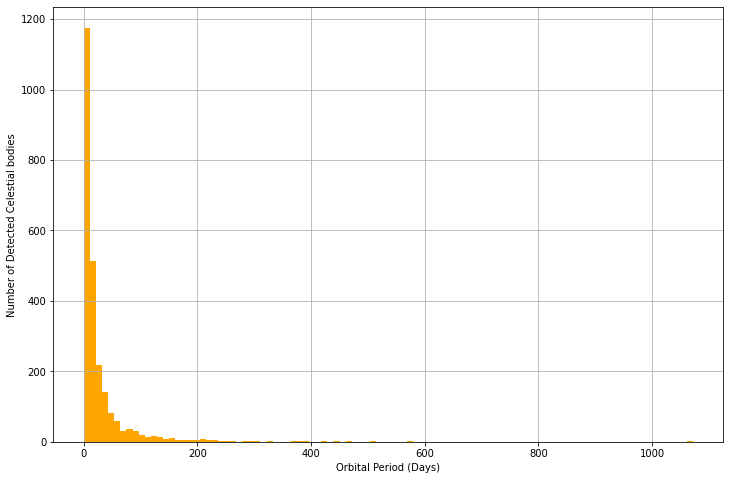

In [34]:
ax3 = d1.koi_period.hist(bins=100, figsize=(12, 8), color = 'orange')
ax3.set_xlabel("Orbital Period (Days)")
ax3.set_ylabel("Number of Detected Celestial bodies")

## PLANETARY INCLINATION

(75.0, 100.0)

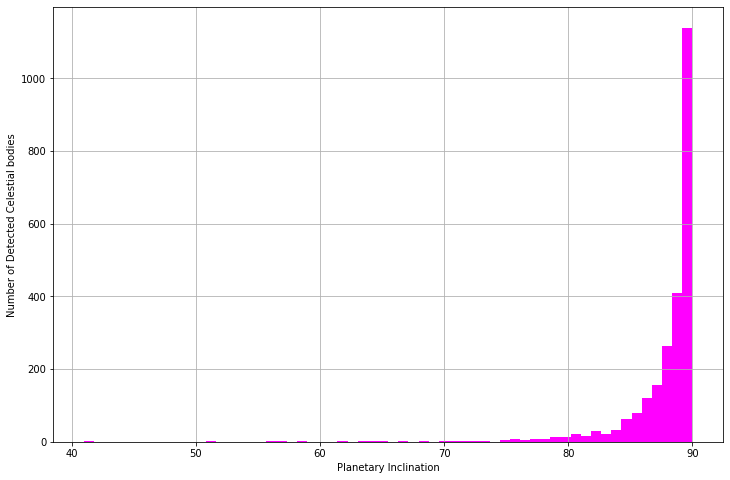

In [35]:
ax3 = d1.koi_incl.hist(bins=60, figsize=(12, 8), color = 'magenta')
ax3.set_xlabel("Planetary Inclination")
ax3.set_ylabel("Number of Detected Celestial bodies")
ax.set_xlim(75,100)

## PLANETARY RADII

Text(0, 0.5, 'Number of Detected Celestial bodies')

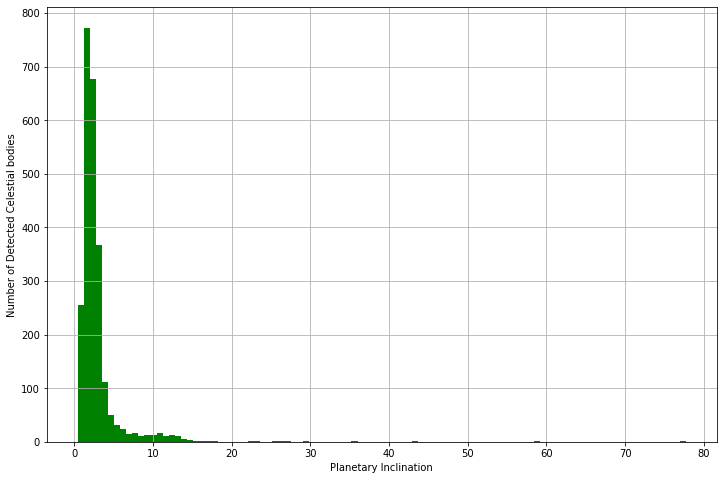

In [36]:
ax3 = d1.koi_prad.hist(bins=100, figsize=(12, 8), color = 'green')
ax3.set_xlabel("Planetary Inclination")
ax3.set_ylabel("Number of Detected Celestial bodies")

## PLANET TEMPERATURE

Text(0, 0.5, 'Number of Detected Celestial bodies')

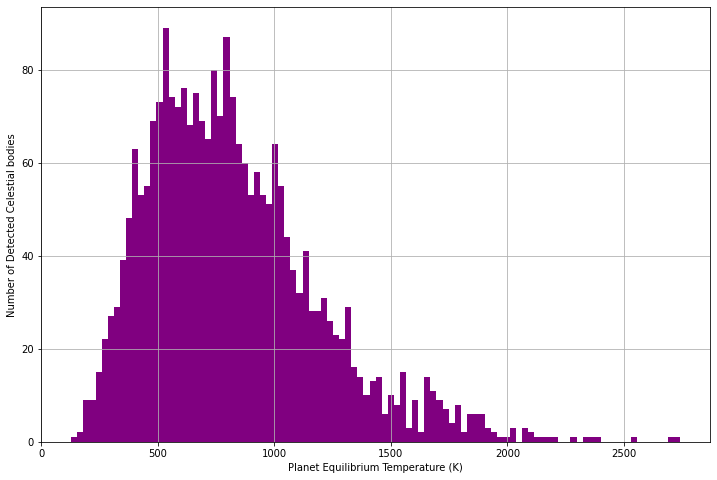

In [37]:
ax3 = d1.koi_teq.hist(bins=100, figsize=(12, 8), color = 'purple')
ax3.set_xlabel("Planet Equilibrium Temperature (K)")
ax3.set_ylabel("Number of Detected Celestial bodies")

# PLANETARY VS STELLAR PROPERTIES

## RADII OF STELLAR AND PLANETARY BODIES

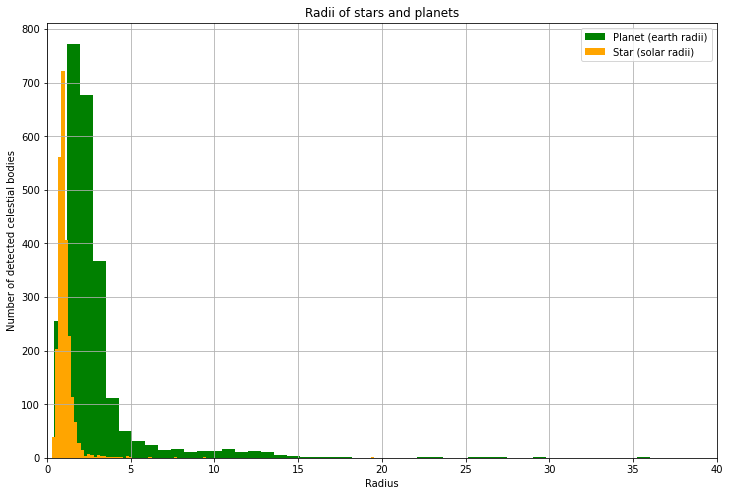

In [38]:
# radius only for stars with a confirmed planet, the rest is not known.
ax = d1.koi_prad.hist(bins=100, label='Planet (earth radii)',color = 'green')
ax.set_title("Radii of stars and planets")
ax.set_ylabel("Number of detected celestial bodies")
d1.koi_srad.hist(ax=ax, bins=100, figsize=(12, 8), label="Star (solar radii)",color = 'orange')
ax.set_xlabel("Radius")
ax.set_xlim(0,40)
ax.legend()

## EFFECTIVE TEMPERATURE OF PLANETARY AND STELLAR BODIES

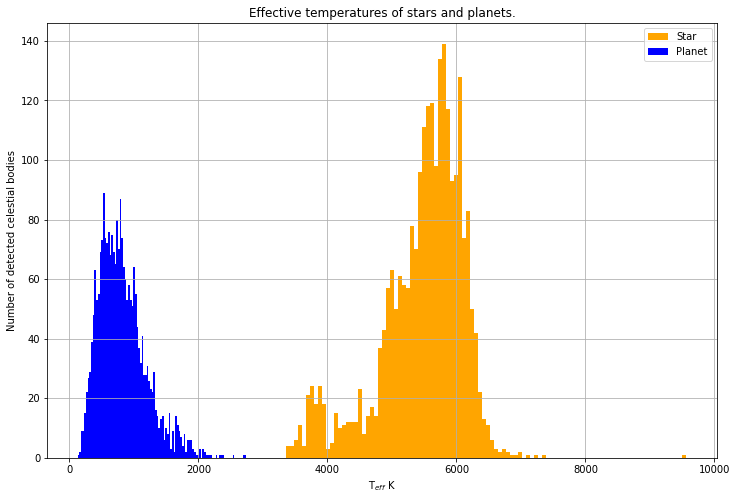

In [39]:
ax = d1.koi_steff.hist(bins=100, figsize=(12, 8), label="Star", color = 'orange')
ax.set_xlabel("T$_{eff}$ K")
ax.set_ylabel("Number of detected celestial bodies")
ax.set_title("Effective temperatures of stars and planets.")
d1.koi_teq.hist(ax=ax, bins=100, label='Planet', color = 'b')
ax.legend()

In [40]:
#finaldf = df2.copy()
one.drop(['koi_ldm_coeff3',     
'koi_eccen',           
'koi_ldm_coeff4',      
'koi_zmag',            
'koi_fwm_sdec',        
'koi_hmag',            
'koi_jmag',            
'koi_kepmag',         
'koi_rmag',            
'dec',                 
'koi_gmag',           
'koi_kmag',           
'koi_imag',            
'koi_srho',            
'koi_fwm_pdeco',       
'koi_fwm_sdeco',       
'koi_ldm_coeff2',      
'koi_fwm_sra',        
'koi_fwm_prao',        
'ra'], axis=1,inplace=True)

In [41]:
len(one.columns)

38

array([[<AxesSubplot:xlabel='koi_fpflag_nt', ylabel='koi_fpflag_nt'>,
        <AxesSubplot:xlabel='koi_fpflag_ss', ylabel='koi_fpflag_nt'>,
        <AxesSubplot:xlabel='koi_fpflag_co', ylabel='koi_fpflag_nt'>,
        ...,
        <AxesSubplot:xlabel='koi_dikco_mdec', ylabel='koi_fpflag_nt'>,
        <AxesSubplot:xlabel='koi_dikco_msky', ylabel='koi_fpflag_nt'>,
        <AxesSubplot:xlabel='koi_disposition', ylabel='koi_fpflag_nt'>],
       [<AxesSubplot:xlabel='koi_fpflag_nt', ylabel='koi_fpflag_ss'>,
        <AxesSubplot:xlabel='koi_fpflag_ss', ylabel='koi_fpflag_ss'>,
        <AxesSubplot:xlabel='koi_fpflag_co', ylabel='koi_fpflag_ss'>,
        ...,
        <AxesSubplot:xlabel='koi_dikco_mdec', ylabel='koi_fpflag_ss'>,
        <AxesSubplot:xlabel='koi_dikco_msky', ylabel='koi_fpflag_ss'>,
        <AxesSubplot:xlabel='koi_disposition', ylabel='koi_fpflag_ss'>],
       [<AxesSubplot:xlabel='koi_fpflag_nt', ylabel='koi_fpflag_co'>,
        <AxesSubplot:xlabel='koi_fpflag_ss', ylabel='k

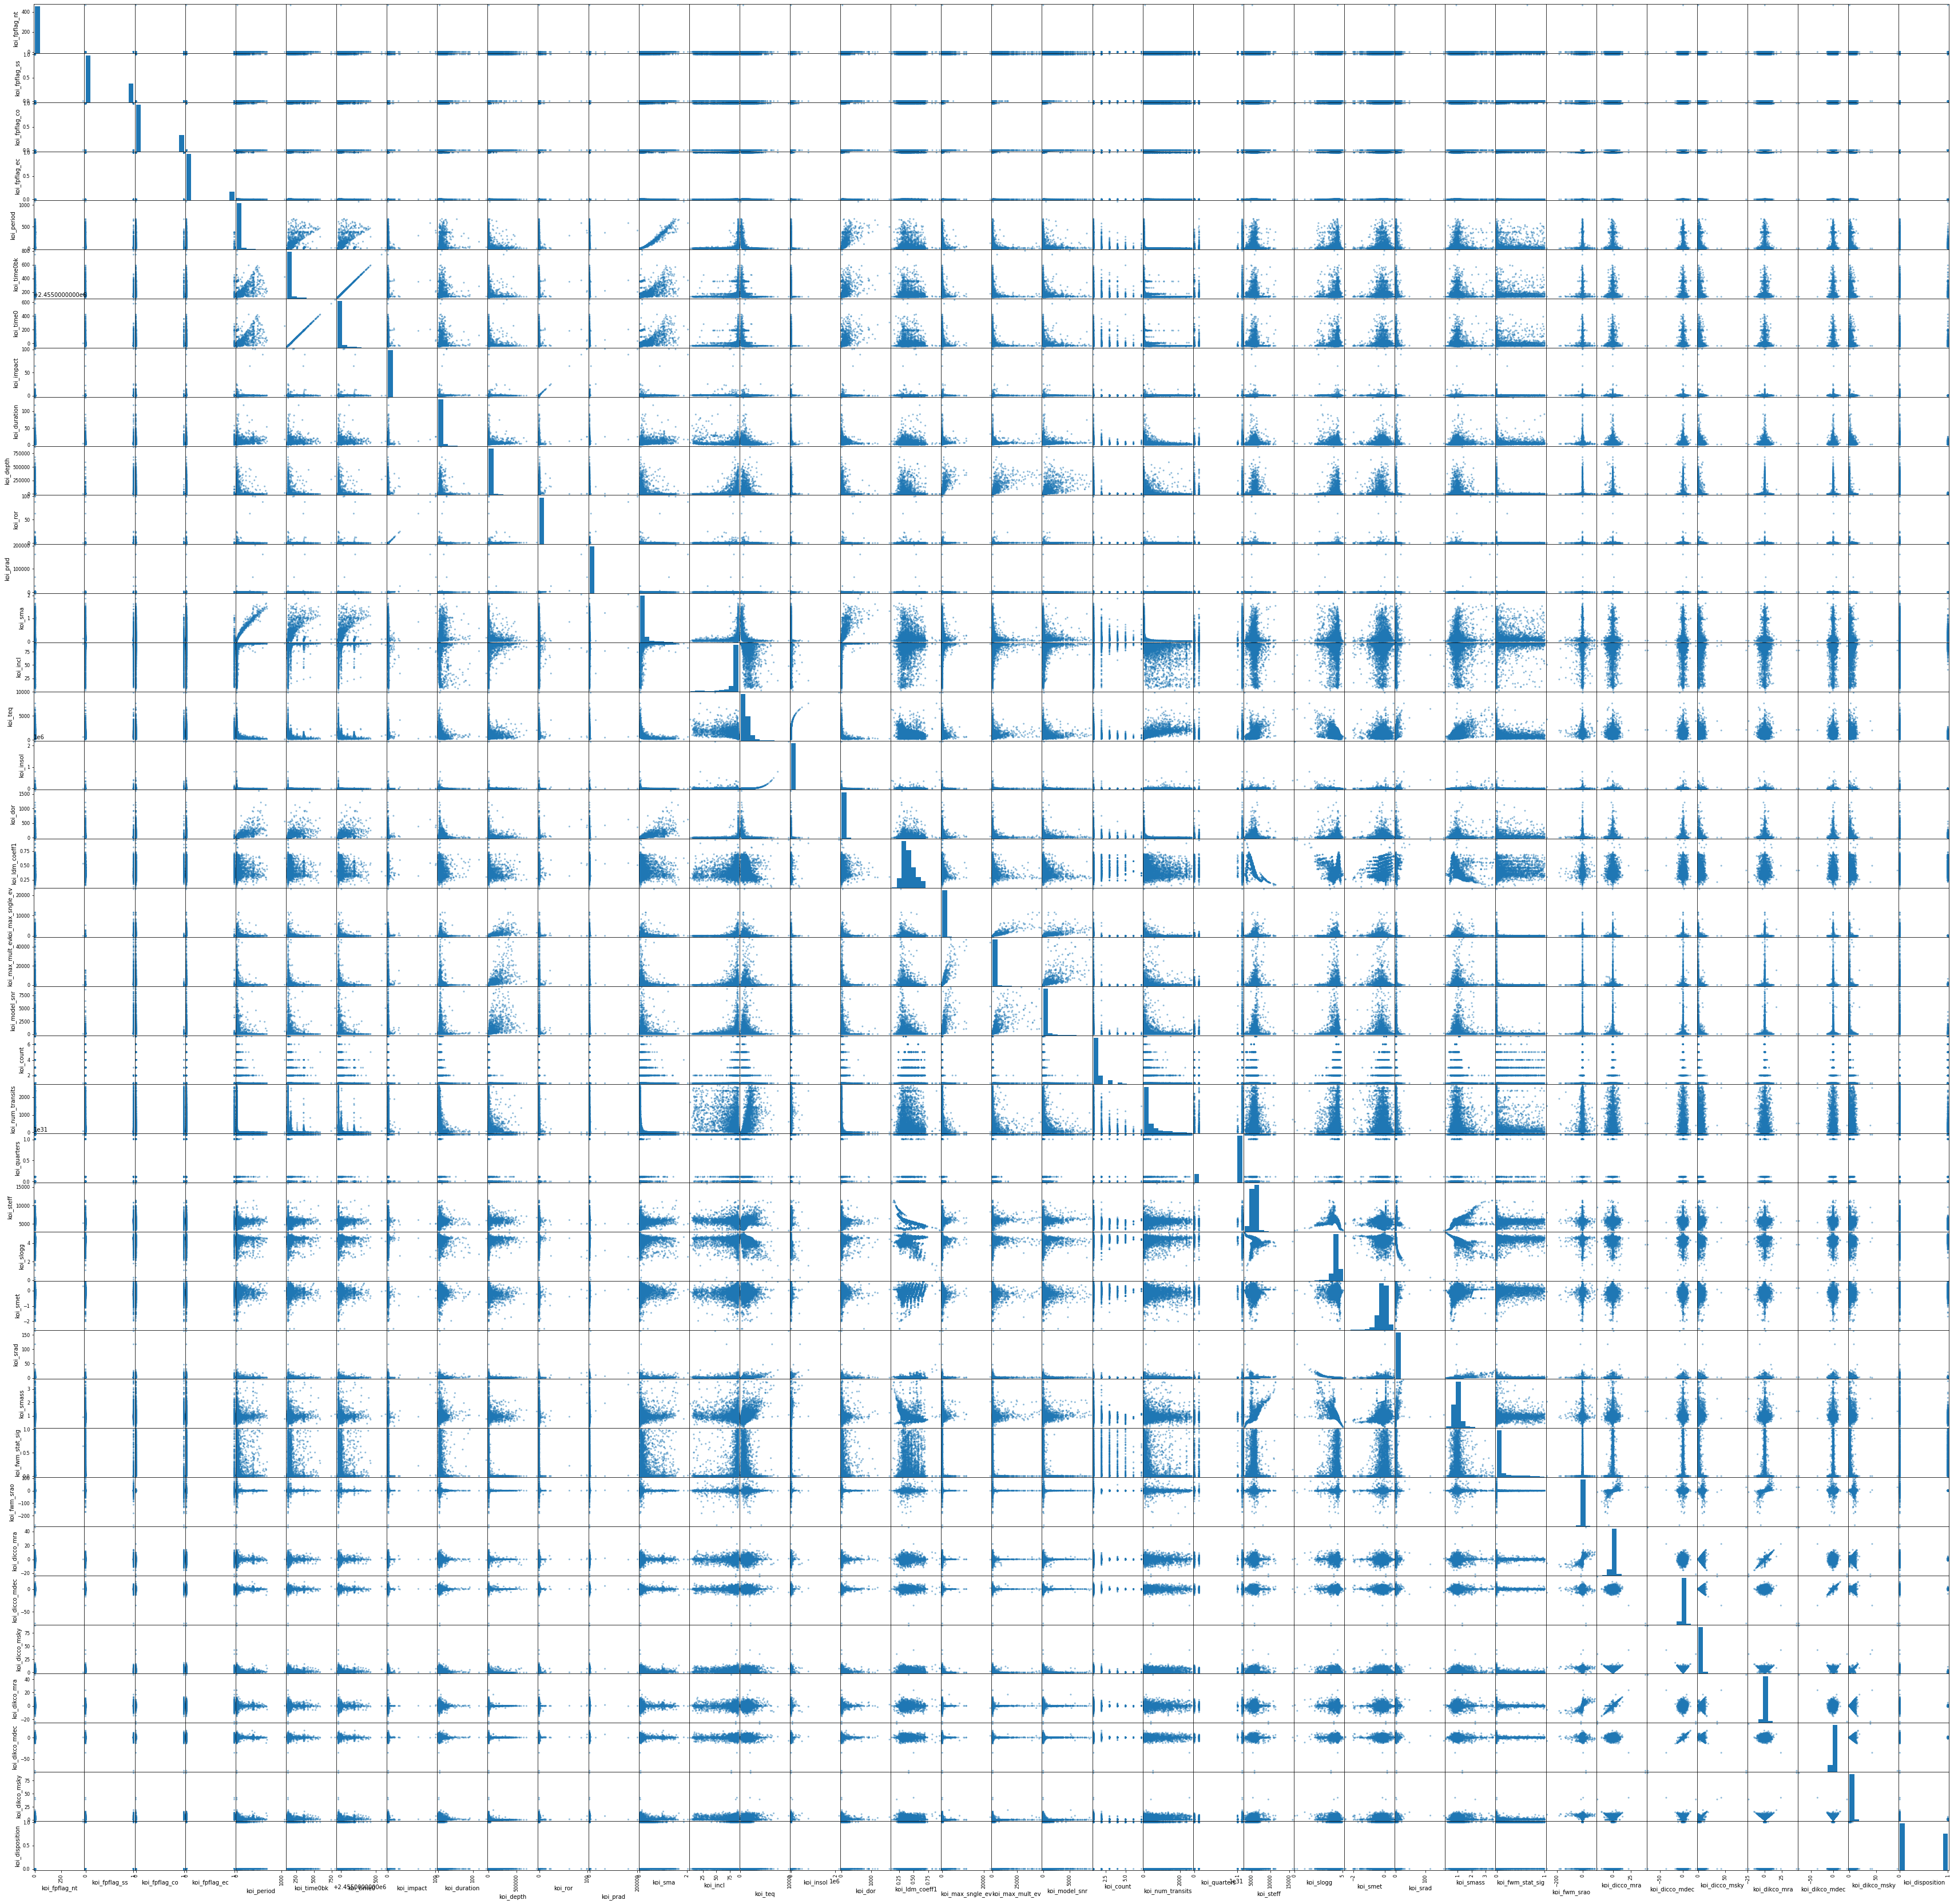

In [42]:
pd.plotting.scatter_matrix(one,figsize=(60,60))

<AxesSubplot:>

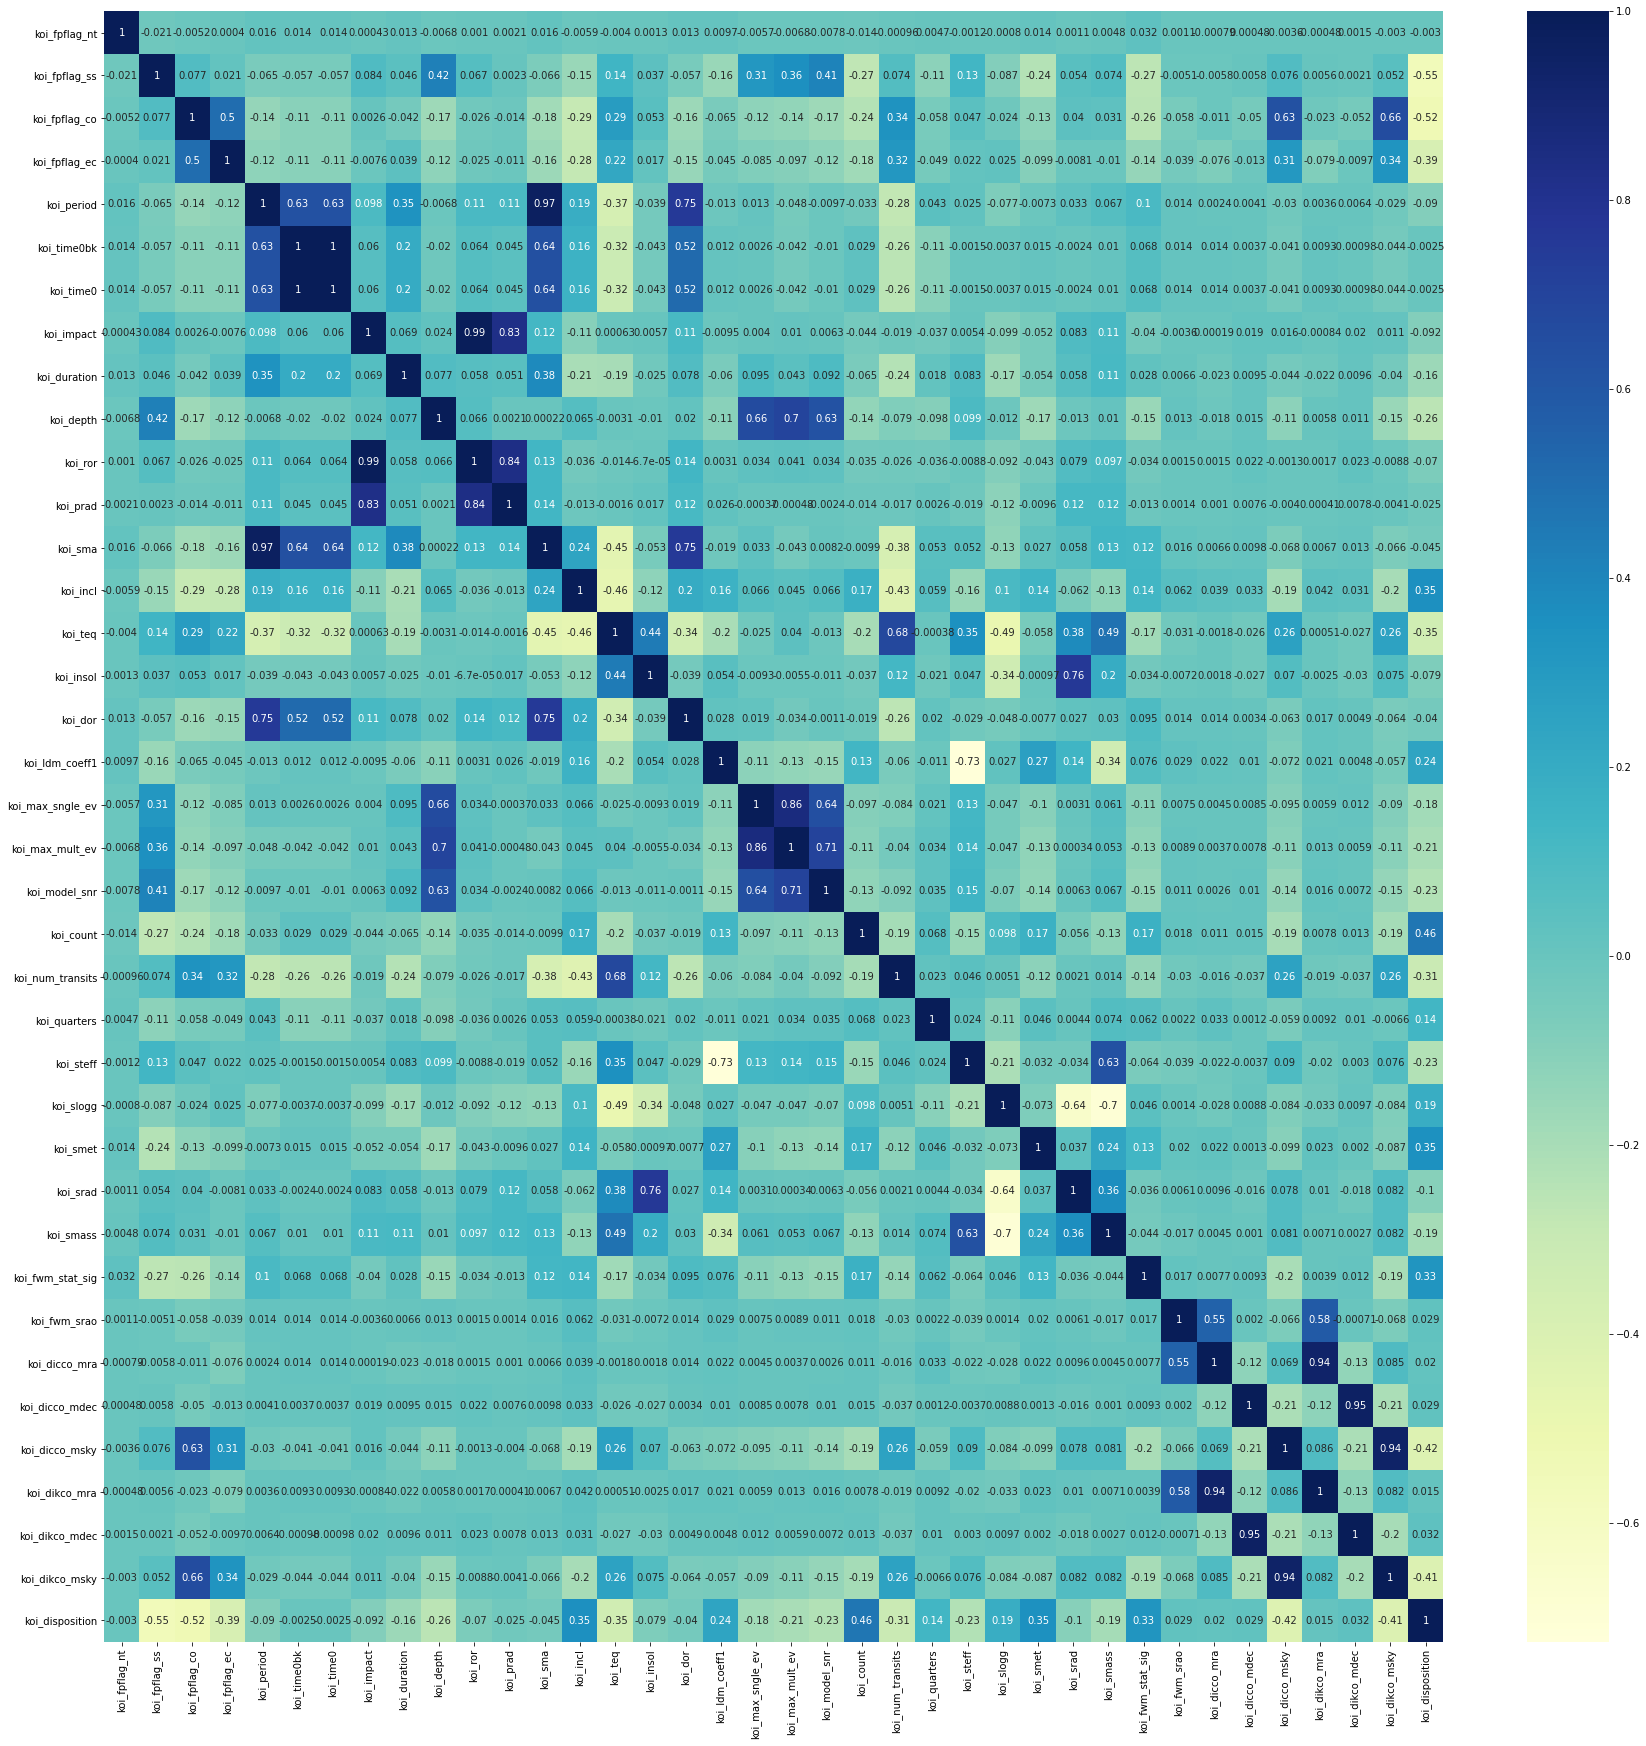

In [91]:
fig33 = plt.figure(figsize=(30,30))
#sns.heatmap(one.corr())
sns.heatmap(one.corr(), cmap="YlGnBu", annot=True)

In [43]:
one.head(5)

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0              0              0              0              0    9.488036   
1              0              0              0              0   54.418383   
3              0              1              0              0    1.736952   
4              0              0              0              0    2.525592   
8              0              1              1              0    7.361790   

   koi_time0bk    koi_time0  koi_impact  koi_duration  koi_depth   koi_ror  \
0   170.538750  2455003.539       0.146       2.95750      616.0  0.022344   
1   162.513840  2454995.514       0.586       4.50700      875.0  0.027954   
3   170.307565  2455003.308       1.276       2.40641     8080.0  0.387394   
4   171.595550  2455004.596       0.701       1.65450      603.0  0.024064   
8   132.250530  2454965.251       1.169       5.02200      234.0  0.183387   

   koi_prad  koi_sma  koi_incl  koi_teq  koi_insol  koi_dor  koi_ldm_coeff1  \
0      2.26   0.0853     89.66    793.0      93.59   24.810          0.4603   
1      2.83   0.2734     89.57    443.0       9.11   77.900          0.4603   
3     33.46   0.0267     67.09   1395.0     891.96    3.278          0.3556   
4      2.75   0.0374     85.41   1406.0     926.16    8.750          0.3661   
8     39.21   0.0820     60.92   1342.0     767.22    2.400          0.3201   

   koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr  koi_count  \
0          5.135849        28.470820           35.8          2   
1          7.027669        20.109507           25.8          2   
3         39.066550       541.895100          505.6          1   
4          4.749945        33.191900           40.9          1   
8         10.964684        46.153080           47.7          1   

   koi_num_transits  koi_quarters  koi_steff  koi_slogg  koi_smet  koi_srad  \
0             142.0  1.111110e+31     5455.0      4.467      0.14     0.927   
1              25.0  1.111110e+31     5455.0      4.467      0.14     0.927   
3             621.0  1.111110e+31     5805.0      4.564     -0.52     0.791   
4             515.0  1.111110e+30     6031.0      4.438      0.07     1.046   
8             185.0  1.111110e+31     6227.0      3.986      0.00     1.958   

   koi_smass  koi_fwm_stat_sig  koi_fwm_srao  koi_dicco_mra  koi_dicco_mdec  \
0      0.919             0.002         0.430         -0.010           0.200   
1      0.919             0.003        -0.630          0.390           0.000   
3      0.836             0.000        -0.111         -0.249           0.147   
4      1.095             0.733        -0.010          0.030          -0.090   
8      1.358             0.000       -13.450         -4.506           7.710   

   koi_dicco_msky  koi_dikco_mra  koi_dikco_mdec  koi_dikco_msky  \
0           0.200          0.080           0.310           0.320   
1           0.390          0.490           0.120           0.500   
3           0.289         -0.257           0.099           0.276   
4           0.100          0.070           0.020           0.070   
8           8.930         -4.537           7.713           8.948   

   koi_disposition  
0                1  
1                1  
3                0  
4                1  
8                0

In [44]:
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

# CLASSIFICATION ALGORITHMS TRAINING AND TESTING

## DECISION TREE

In [45]:
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

In [46]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x = scx.fit_transform(x)

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)
xtrain.shape

(3870, 37)

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [49]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


ypred = dtr.predict(xtest)

from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(ytest, ypred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(ytest, ypred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 99.4 %
precision: [0.992569  0.9958159]
recall: [0.99680171 0.99029126]
fscore: [0.99468085 0.9930459 ]


## GAUSSIAN NAIVE BAYES

In [50]:
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [52]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [53]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [54]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, Y_pred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, Y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 50.75 %
precision: [0.69348659 0.47281831]
recall: [0.19716776 0.89203779]
fscore: [0.30703986 0.61804582]


## RANDOM FOREST

In [55]:
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

In [56]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [58]:
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )
rf_classifier.fit(xtrain, ytrain)
y_pred = rf_classifier.predict(xtest)

In [59]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 99.52 %
precision: [0.99242424 0.99863946]
recall: [0.99891068 0.99055331]
fscore: [0.99565689 0.99457995]


## SUPPORT VECTOR MACHINE

In [60]:
from sklearn.svm import SVC
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

In [61]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [62]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [63]:
svc_classifier = SVC()
svc_classifier.fit(xtrain, ytrain)
ypred = svc_classifier.predict(xtest)

In [64]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(ytest, ypred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(ytest, ypred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 97.59 %
precision: [0.98777778 0.96179183]
recall: [0.96840959 0.9851552 ]
fscore: [0.9779978  0.97333333]


## K-NEAREST NEIGHBOR

In [65]:
from sklearn.neighbors import KNeighborsClassifier
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

In [66]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [67]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
knn_classifier = KNeighborsClassifier(8)
knn_classifier.fit(xtrain, ytrain)
ypred = knn_classifier.predict(xtest)

In [68]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(ytest, ypred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(ytest, ypred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 96.44 %
precision: [0.98751419 0.93830334]
recall: [0.94771242 0.9851552 ]
fscore: [0.967204   0.96115866]


## LOGISTIC REGRESSION

In [69]:
from sklearn.linear_model import LogisticRegression
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

In [70]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [71]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)


In [72]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(ytest, ypred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(ytest, ypred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 97.59 %
precision: [0.98886414 0.96057819]
recall: [0.96732026 0.98650472]
fscore: [0.97797357 0.97336884]


## STOCHASTIC GRADIENT DESCENT

In [73]:
from sklearn import linear_model
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

In [74]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [75]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
SGDClf = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(xtrain, ytrain)
ypred = SGDClf.predict(xtest)

In [76]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(ytest, ypred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(ytest, ypred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 97.23 %
precision: [0.97391304 0.97023004]
recall: [0.97603486 0.96761134]
fscore: [0.9749728  0.96891892]


## ARTIFICIAL NEURAL NETWORKS

In [77]:
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

In [78]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [79]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier = Sequential()
classifier.add(Dense(6, activation = 'relu', input_shape = (xtrain.shape[1], )))
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = classifier.fit(xtrain, ytrain, batch_size=32, epochs=200, validation_split=0.1, verbose=2)
ypred = classifier.predict(xtest)

Epoch 1/200
109/109 - 1s - loss: 0.7228 - accuracy: 0.4620 - val_loss: 0.6588 - val_accuracy: 0.5969 - 694ms/epoch - 6ms/step
Epoch 2/200
109/109 - 0s - loss: 0.6152 - accuracy: 0.7183 - val_loss: 0.5626 - val_accuracy: 0.7700 - 105ms/epoch - 959us/step
Epoch 3/200
109/109 - 0s - loss: 0.4665 - accuracy: 0.8831 - val_loss: 0.3597 - val_accuracy: 0.9328 - 104ms/epoch - 951us/step
Epoch 4/200
109/109 - 0s - loss: 0.2879 - accuracy: 0.9276 - val_loss: 0.1927 - val_accuracy: 0.9587 - 112ms/epoch - 1ms/step
Epoch 5/200
109/109 - 0s - loss: 0.1924 - accuracy: 0.9440 - val_loss: 0.1265 - val_accuracy: 0.9638 - 110ms/epoch - 1ms/step
Epoch 6/200
109/109 - 0s - loss: 0.1541 - accuracy: 0.9555 - val_loss: 0.1025 - val_accuracy: 0.9690 - 105ms/epoch - 965us/step
Epoch 7/200
109/109 - 0s - loss: 0.1218 - accuracy: 0.9621 - val_loss: 0.0879 - val_accuracy: 0.9690 - 107ms/epoch - 982us/step
Epoch 8/200
109/109 - 0s - loss: 0.1076 - accuracy: 0.9699 - val_loss: 0.0784 - val_accuracy: 0.9742 - 104ms/e

Epoch 65/200
109/109 - 0s - loss: 0.0218 - accuracy: 0.9914 - val_loss: 0.0180 - val_accuracy: 0.9922 - 104ms/epoch - 954us/step
Epoch 66/200
109/109 - 0s - loss: 0.0249 - accuracy: 0.9888 - val_loss: 0.0170 - val_accuracy: 0.9922 - 104ms/epoch - 954us/step
Epoch 67/200
109/109 - 0s - loss: 0.0212 - accuracy: 0.9922 - val_loss: 0.0153 - val_accuracy: 0.9948 - 100ms/epoch - 921us/step
Epoch 68/200
109/109 - 0s - loss: 0.0248 - accuracy: 0.9900 - val_loss: 0.0157 - val_accuracy: 0.9948 - 104ms/epoch - 954us/step
Epoch 69/200
109/109 - 0s - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.0144 - val_accuracy: 0.9948 - 104ms/epoch - 954us/step
Epoch 70/200
109/109 - 0s - loss: 0.0226 - accuracy: 0.9911 - val_loss: 0.0158 - val_accuracy: 0.9922 - 104ms/epoch - 954us/step
Epoch 71/200
109/109 - 0s - loss: 0.0247 - accuracy: 0.9900 - val_loss: 0.0154 - val_accuracy: 0.9948 - 117ms/epoch - 1ms/step
Epoch 72/200
109/109 - 0s - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0147 - val_accuracy: 0.99

Epoch 129/200
109/109 - 0s - loss: 0.0139 - accuracy: 0.9940 - val_loss: 0.0098 - val_accuracy: 0.9948 - 106ms/epoch - 968us/step
Epoch 130/200
109/109 - 0s - loss: 0.0148 - accuracy: 0.9940 - val_loss: 0.0088 - val_accuracy: 0.9948 - 112ms/epoch - 1ms/step
Epoch 131/200
109/109 - 0s - loss: 0.0148 - accuracy: 0.9943 - val_loss: 0.0066 - val_accuracy: 1.0000 - 112ms/epoch - 1ms/step
Epoch 132/200
109/109 - 0s - loss: 0.0149 - accuracy: 0.9928 - val_loss: 0.0086 - val_accuracy: 0.9974 - 109ms/epoch - 1000us/step
Epoch 133/200
109/109 - 0s - loss: 0.0155 - accuracy: 0.9928 - val_loss: 0.0066 - val_accuracy: 1.0000 - 98ms/epoch - 903us/step
Epoch 134/200
109/109 - 0s - loss: 0.0142 - accuracy: 0.9937 - val_loss: 0.0077 - val_accuracy: 0.9974 - 104ms/epoch - 954us/step
Epoch 135/200
109/109 - 0s - loss: 0.0165 - accuracy: 0.9922 - val_loss: 0.0152 - val_accuracy: 0.9974 - 113ms/epoch - 1ms/step
Epoch 136/200
109/109 - 0s - loss: 0.0161 - accuracy: 0.9920 - val_loss: 0.0081 - val_accuracy: 

Epoch 193/200
109/109 - 0s - loss: 0.0170 - accuracy: 0.9928 - val_loss: 0.0089 - val_accuracy: 0.9974 - 105ms/epoch - 967us/step
Epoch 194/200
109/109 - 0s - loss: 0.0145 - accuracy: 0.9928 - val_loss: 0.0086 - val_accuracy: 0.9948 - 104ms/epoch - 954us/step
Epoch 195/200
109/109 - 0s - loss: 0.0143 - accuracy: 0.9943 - val_loss: 0.0081 - val_accuracy: 0.9974 - 104ms/epoch - 954us/step
Epoch 196/200
109/109 - 0s - loss: 0.0139 - accuracy: 0.9940 - val_loss: 0.0060 - val_accuracy: 1.0000 - 104ms/epoch - 954us/step
Epoch 197/200
109/109 - 0s - loss: 0.0158 - accuracy: 0.9934 - val_loss: 0.0115 - val_accuracy: 0.9948 - 104ms/epoch - 954us/step
Epoch 198/200
109/109 - 0s - loss: 0.0112 - accuracy: 0.9951 - val_loss: 0.0078 - val_accuracy: 0.9974 - 100ms/epoch - 915us/step
Epoch 199/200
109/109 - 0s - loss: 0.0102 - accuracy: 0.9963 - val_loss: 0.0093 - val_accuracy: 0.9922 - 102ms/epoch - 935us/step
Epoch 200/200
109/109 - 0s - loss: 0.0143 - accuracy: 0.9945 - val_loss: 0.0107 - val_accu

In [81]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(ytest, ypred.round())*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(ytest, ypred.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 99.64 %
precision: [0.99565217 0.99729364]
recall: [0.99782135 0.99460189]
fscore: [0.99673558 0.99594595]


## K-MEANS

In [99]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [105]:
x = one.iloc[:,0:-1]
y = one.iloc[:,-1]

# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [106]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(xtrain,ytrain)

#testing predictions
ypred = kmeans.predict(xtest)

C:\Users\Aishwarya Menon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [107]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(ytest, ypred.round())*100
print('Accuracy: ' + str(round(accuracy, 2)) + ' %')

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(ytest, ypred.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))





Accuracy: 75.11 %
precision: [0.98839458 0.64360771]
recall: [0.55664488 0.99190283]
fscore: [0.71219512 0.78066914]


https://www.codingninjas.com/codestudio/library/applying-k-means-on-iris-dataset